In [1]:
import pandas as pd

In [2]:
#Leemos el train.csv y el test.csv
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
train_df.describe()
#891 o 40% del total de pasajeros al bordo del titanic (2224)
#Cerca del 30% de los pasajeros tenían hermanos o cónyuges (75% con valor 1 en columna SibSp)
#La mayoría de pasajeros >75% no viajaron con padres o niños (columna Parch a 0 hasta el 75%)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Vamos a testear suposiciones.
#¿Los pasajeros de primera clase tendrán mayores posibilidades de sobrevivir?
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Vemos que la suposición es cierta, los de primera clase tendrán más posibilidades de sobrevivir que los de segunda y tercera.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
#Otra suposición:
#¿Tendrán las mujeres más posiblidades de sobrevivir?
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Se puede apreciar que también es cierta.

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
#Otra suposición:
#¿Tendrán los pasajeros con hermanos y/o cónyuges más posibilidades de sobrevivir?
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Aquí podemos ver que los que tienen 1 o 2 sibsp tienen mas probabilidades que los de 0. Sin embargo los de 5 y 8 no tienen ninguna probabilidad

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
#Otra suposición
#¿Tendrán los pasajeros con padres y/o hijos más probabilidades de sobrevivir?
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Vemos que hasta 3 si, pero a más de 3 tiene menos probabilidad del que tenga 0.
#Hay que recordar que la fortuna tiene un rol importante para sobrevivir.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

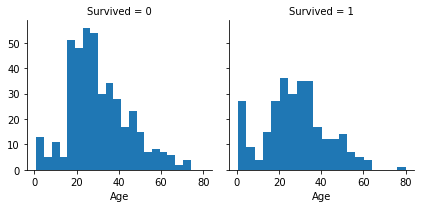

In [12]:
#Histograma según la edad, cuantos sobrevivieron y cuantos no
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
#Podemos apreciar que muchos pequeños sobrevivieron (gráfica de la derecha cerca del 0). También vemos que algunas personas
#mayores, cerca de los 80 también sobrevivieron. La edad es relevante para el análisis.

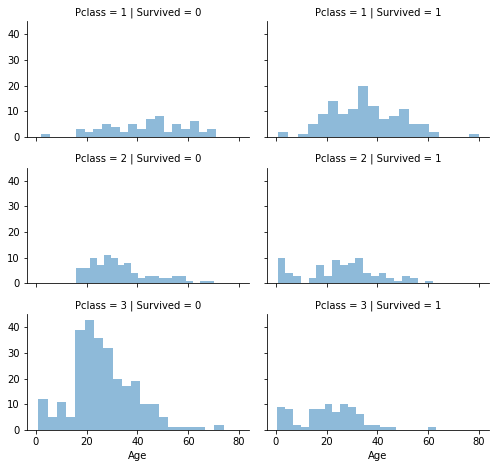

In [13]:
#Histogramas según la edad y la Pclass, cuantos sobrevivieron y cuantos no
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
#Podemos apreciar que la gráfica de arriba a la derecha es densa, por lo que muchos de la Pclass = 1 sobrevivieron.
#También vemos que la gráfica de abajo a la izquierda es muy densa, por lo que muchos de la Pclass = 3 no sobrevivieros.
#la clase del pasajero está correlacionada con la supervivencia.

C:\Users\RUIZ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\RUIZ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


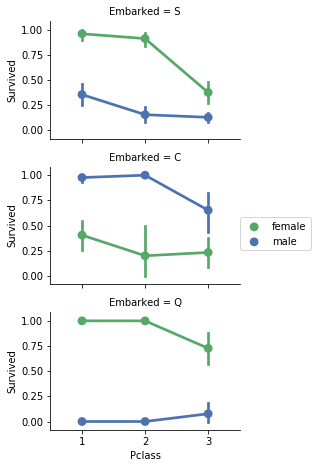

In [14]:
#Vamos a comprobar ahora si la localización donde embarcó un pasajero tiene relación con la supervivencia.
#Realizamos un pointplot que relaciona la pclass, survived y sex con cada uno de los puertos de embarque.
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
#Podemos observar que los hombres embarcados en Cherbourg tienen mas alta probabilidad de supervivencia que las mujeres,
#al contrario que las otras localizaciones. ¿Quiere decir esto que Embarked tiene efecto en la supervivencia? Una posible causa
#es que los hombres que embarcaron en Cherbourg fueran la gran mayoría de primera y segunda clase. La probabilidad de
#supervivencia tiene mas relación con Pclass que con Embarked.

C:\Users\RUIZ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


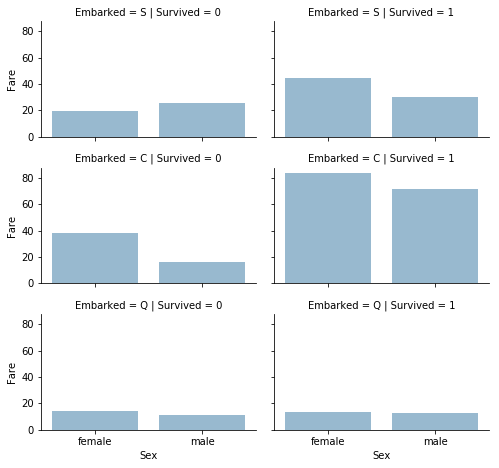

In [15]:
#Creamos varios barplot que relacionan el sexo y la tarifa, con el sitio de embarque y si sobrevivió o no.
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
# Se puede apreciar que los pasajeros con tarifas más altas tienen más probabilidades de sobrevivir.
# Además vemos que las tarifas más altas, se encuentran en el embarque de Chersbourg, lo que nos dice que los embarcados allí,
# tendrían más posibilidades de sobrevivir. Además vemos que el embarque de Queenstown es el que tiene las tarifas más bajas.
# Sería bueno incluir Fare en nuestro análisis.

In [16]:
#Ahora vamos a excluir las características irrelevantes e incluir las relevantes.
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [17]:
#El nombre del pasajero puede tener una señal para la supervivencia, por ej. si incluye Miss o Mrs sabemos que se trata 
#de una mujer y por lo tanto las probabilidades de supervivencia son mayores.
#Como consecuencia vamos a crear una nueva característica llamada Title
#Extraemos mediante expresiones regulares si es Mr., Mrs. etc y la añadimos a la nueva característica Title. 
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
#Comparamos con Sex, cada uno de los Title y cuantos hay mediantes crosstab
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
#Hay demasiados titles, vamos a agrupar la mayoría en Rare y quedarnos con los principales y ver su correspondencia con supervivencia
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#Vemos que Miss y Mrs tienen la probabilidad más alta de supervivencia, incluso que los Rare combinados.
#Title está correlacionado con la supervivencia, no así el nombre.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
#Vamos a convertir los titles (categoricas variables) en (ordinales variables). Los valores NAN le vamos a asignar 0
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [20]:
#Procedemos a eliminar las variables Name y PassengerId que no son relevantes.
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1) # De test_df no eliminamos PassengerId
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [22]:
#Vamos a conventir la característica Sex (String) en valores numéricos, mejor para los algoritmos machine learning
#Female = 1, Male = 0
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


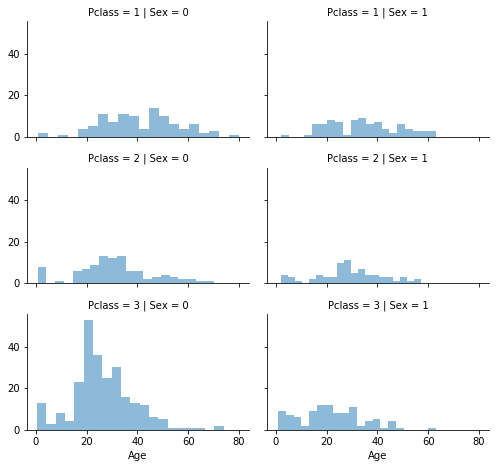

In [23]:
#Ahora vamos a arreglar el problema de los valores null para convertirlos en not null inyectando nuevos valores.
#No podemos inyectarle cualquier valor, los valores añadidos tienen que ser razonables.
#Para ello vamos a ver la correlación entre Age, Sex, y Pclass
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [24]:
#Lo siguiente es prepara un array vacío de 0s. Ahí es donde añadiremos los valores Age que reemplazaran a los valores nulos
#Las estimaciones estarán basadas en combinaciones de Pclass x Sex.
#Será un array de 2 filas (Sex (0,1)) y 3 columnas (Pclass (1,2,3))
import numpy as np

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
#Entonces iteramos sobre Pclass(1,2,3) y Sex(0,1) para calcular los valores estimados Age para 6 combinaciones.
#we'll fill in incomplete values of age. We will do that by calculating the median value found by using age values 
#for different sex and class. As we have two sexes (1, 0) and three classes (1, 2, 3), 
#we will have 6 combinations and we will calculate the age from each combination.
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                               (dataset['Pclass'] == j+1)]['Age'].dropna() #Eliminamos los nulos de Age de cada Sex y Pclass
            
            age_guess = guess_df.median() #Calcula la media de los valores que quedan
            
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5 #Le asigna a la edad estimada según la fórmula al array guess_ages creado anteriormente
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j] #Añade al dataset los valores de guess_ages para cada Sex y Pclass en los valores que son nulos
    dataset['Age'] = dataset['Age'].astype(int) #Convierte el valor Age en entero.
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
#Let us create Age bands and determine correlations with Survived.
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) #Creamos una variable nueva AgeBand y la cortamos en 5 rangos
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
#Vamos a transformar esos AgeBands en variables ordinales.
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
#Ahora podemos eliminar la característica AgeBand
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [29]:
#Vamos a combinar Parch y SibSp en una sola característica y la nombraremos FamilySize
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 #Al tamaño de FamilySize le añadimos 1 para el propio pasajero, de esta forma FamilySize nunca será 0

#Comparamos FamilySize con Survived
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
#Let check whether they are alone in the ship or not.
#Vamos a ver la correlación con la supervivencia de si un pasajero está solo o no.
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean() #Lo comparamos con la supervivencia.
#Todos los que no estan solos, que tienen compañía de 1, 2, 3, etc personas serían el 0, el 1 para los que están solos
#This tells us that if a passenger had companion/s, he or she had better chances. So let’s just discard Parch, SibSp, and FamilySize and focus on the isAlone

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
#Por lo tanto, vamos a eliminar Parch, SibSp, y FamilySize y nos vamos a enfocar si el pasajero isAlone o no.
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [32]:
#Vamos a crear una caracteristica artifical que combine Pclass y Age
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass #Multiplicamos la edad (ya en rango) con la Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10) #Mostramos las 3 columnas

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
#Anteriormente vimos que la caracteristica categórica Embarked tiene 2 valores perdidos.
#Vamos a rellenar esos valores con la frecuencia más alta (lo que llamamos moda)
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
#Hemos comprobado que la moda de Embarked es 'S'

'S'

In [34]:
#Rellenamos los valores vacios con S (la moda)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

#Comparamos el puerto de Embarque con la probabilidad de sobrevivr
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
#Ahora vamos a convertir las características categóricas (Embarked) en numéricas, al igual que hicimos anteriormente para Sex
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [36]:
#Ahora vamos a completar el valor perdido en la característica Fare del test_df
#Para ello lo vamos a rellenar con la media de todas las demas Fare.
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [37]:
#Ahora vamos a crear una variable FareBand por simplicidad
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) #Vamos a dividirla en 4 rangos
#La comparamos con la supervivencia
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
#Nuevamente la convertimos en valores ordinal (al igual que hicimos con AgeBand)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

train_df = train_df.drop(['FareBand'], axis=1) #Eliminamos la variable FareBand
    
dataset['Fare'] = dataset['Fare'].astype(int) #Lo convertimos en entero

train_df['Fare'] = train_df['Fare'].astype(int) #Convertimos Fare de train_df en entero

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
#Tomemos también una mirada al test_df
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [49]:
#Vamos a comenzar a entrenar el modelo y aprender de los datos, una vez realizada la manipulación y transformación de datos.
#Primero definimos las variables independientes (X_train) y el target (Y_train) en nuestro training set (similarmente para el test set)
X_train = train_df.drop("Survived", axis=1) #quitamos Survived
Y_train = train_df["Survived"] #target es Survived
X_test = test_df.drop("PassengerId", axis=1).copy() #quitamos PassengerId
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [53]:
#Vamos a entrenar el modelo utilizando Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train) #Ajustamos el training set
Y_pred = logreg.predict(X_test) #Predecimos el Y_pred

acc_log = round(logreg.score(X_train, Y_train)*100, 2) #Score de Logistic Regression, porcentaje y 2 decimales
acc_log

#81.26% es la exactitud de la Regresión Logística cuando predecimos si un pasajero sobrevivió o no.

81.26

In [56]:
#Ahora vamos a probar otro modelo (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

#86.62 es la exactitud utilizando Random Forest. Es significativamente más alto que Logistic Regression. Esto es normal, ya que
#diferentes algoritmos tienen diferentes mecanismo y niveles de exactitud diferentes. El objetivo es escoger el que tenga
#una exactitud más alta o usar todos los algoritmos apropiados y realizar la media de los resultados

86.64